### Importera bibliotek

In [62]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

### 2. Förberedelser

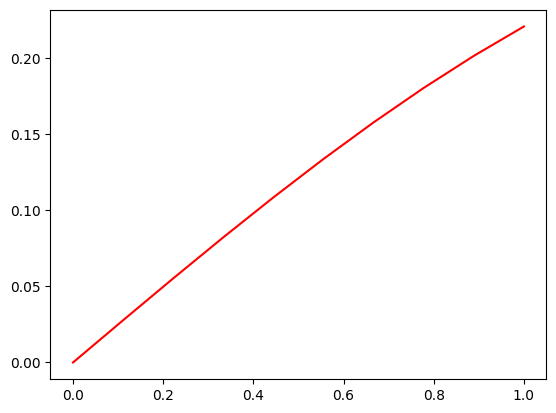

In [57]:
b = 2 # parameter för rayleigh fördelning
M = 10 # antal punkter

# ett visst antal utfall
x_obs = stats.rayleigh.rvs(scale= b, size=1000)
# Om ingen scale eller loc får vi fördelningen utan att den är delat med något eller adderad med något. 



t = np.linspace(0, 1, M) 
pdf = stats.rayleigh.pdf(t, scale=b) 
plt.plot(t, pdf, "red") 
plt.show()

In [61]:

bounds = [(-100,100), (-100,100)] 
# Vad vi antar att vår "scale" b är och vad vår "loc" som vi inte ändrat på är i för intervall
# Alltså är det en två dimensionell sökande efter maximumpunkt. Vi måste köra på båda
stats.fit(stats.rayleigh, x_obs, bounds=bounds)

  params: FitParams(loc=np.float64(-0.08196276644019118), scale=np.float64(2.0615646025987218))
 success: True
 message: 'Optimization terminated successfully.'

### 4. Labborationsuppgifter

#### Problem 1

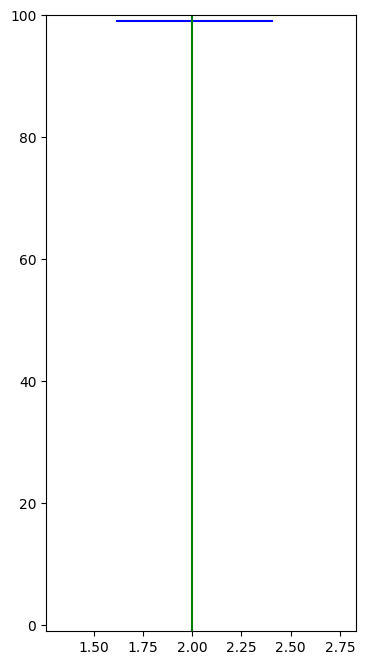

In [65]:
## Problem 1: Simulering av konfidensintervall
# Parametrar
# Antal mätningar
n = 25
# Väntevärdet
mu = 2
# Standardavvikelsen
sigma = 1
# Ett minus konfidensgraden
alpha = 0.05
# Antal intervall
m = 100
# Simulera n observationer för varje intervall.
x = stats.norm.rvs(loc=mu, scale=sigma, size=(m, n))
# Skatta mu med medelvärdet.
xbar = np.mean(x, axis=-1)
# Beräkna kvantilerna och standardavvikelsen för
# medelvärdet.
lambda_alpha_2 = stats.norm.ppf(1 - alpha / 2)
D = sigma / np.sqrt(n)
# Beräkna undre och övre gränserna.
undre = xbar - lambda_alpha_2 * D
övre = xbar + lambda_alpha_2 * D

## Problem 1: Simulering av konfidensintervall (forts.)
# Skapa en figur med storlek 4 Ö 8 tum.
plt.figure(figsize=(4, 8))
# Rita upp alla intervall
for k in range(m):
    # Rödmarkera alla intervall som missar mu.
    if övre[k] < mu or undre[k] > mu:
        color = 'r'
    else:
        color = 'b'
plt.plot([undre[k], övre[k]], [k, k], color)
# Fixa till gränserna så att figuren ser lite bättre ut.
b_min = np.min(undre)
b_max = np.max(övre)
plt.axis([b_min, b_max, -1, m])
# Rita ut det sanna värdet.
plt.plot([mu, mu], [-1, m], 'g')
# Visa plotten.
plt.show()